In [2]:
import torch
from PIL import Image
import os
import glob

# Define paths
input_folder = '/home/rikitwiki/Desktop/gts/'
output_folder = '/home/rikitwiki/Desktop/gts_crop_lp/'
model_path = '/home/rikitwiki/Desktop/best.pt'

# Load model
model = torch.hub.load('ultralytics/yolov8', 'custom', path=model_path)  # Adjust this line based on your actual model

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Function to detect and save license plates
def detect_and_save_license_plates(input_folder, output_folder, model):
    for img_path in glob.glob(os.path.join(input_folder, '*.jpg')):  # Adjust the extension if needed
        # Load image
        img = Image.open(img_path)
        
        # Detect license plates
        results = model(img)
        plates = results.pandas().xyxy[0]  # Extract bounding boxes for detected objects
        
        # Iterate through detected license plates
        for i, plate in plates.iterrows():
            # Crop license plate
            cropped_plate = img.crop((plate['xmin'], plate['ymin'], plate['xmax'], plate['ymax']))
            
            # Save cropped license plate
            cropped_plate.save(os.path.join(output_folder, f"plate_{i}_{os.path.basename(img_path)}"))

# Run detection and save
detect_and_save_license_plates(input_folder, output_folder, model)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/rikitwiki/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'ultralytics>=8.0.232', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 KB 853.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 KB 12.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.6.0
    Uninstalling setuptools-59.6.0:
      Successfully uninstalled setuptools-59.6.0
  Attempting uninstall: gitpython
    Found existing installation: GitPython 3.1.18
    Uninstalling GitPython-3.1.18:
      Successfully uninstalled GitPython-3.1.18
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.229
    Uninstalling ultralytics-8.0.229:
      Successfully uninstalled ultralytics-8.0.229

requirements: AutoUpdate success ✅ 5.6s, installed 3 packages: ['gitpython>=3.1.30', 'ultralytics

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
modelhub-client 1.1.0 requires gitpython<3.1.19, but you have gitpython 3.1.41 which is incompatible.
YOLOv5 🚀 2024-2-10 Python-3.10.12 torch-1.13.1+cu117 CPU



YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


Adding AutoShape... 


Exception: 'Detect' object has no attribute 'grid'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [3]:
import torch
from PIL import Image
import os
import glob

# Function to load the model - Adjust this according to your actual setup
def load_model(model_path):
    # If you have a specific function or class for your model, use it here to load the model
    model = torch.load(model_path)  # This is a simplified example; your model loading might differ
    model.eval()  # Set the model to evaluation mode
    return model

# Function to process images and detect license plates
def detect_and_crop(model, input_folder, output_folder):
    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through all images in the input folder
    for img_path in glob.glob(os.path.join(input_folder, '*.jpg')):  # Adjust the pattern as needed
        # Load image
        img = Image.open(img_path).convert('RGB')
        img_tensor = torch.from_numpy(np.array(img)).permute(2, 0, 1).float().unsqueeze(0)  # Adjust as necessary for your model

        # Detect
        with torch.no_grad():
            results = model(img_tensor)  # Adjust this line based on how your model performs detection
        
        # Assuming results are in a format that includes bounding boxes: [xmin, ymin, xmax, ymax]
        for i, (xmin, ymin, xmax, ymax) in enumerate(results['boxes']):  # Adjust based on your results format
            # Crop detected license plate
            cropped_plate = img.crop((xmin, ymin, xmax, ymax))
            
            # Save cropped license plate image
            cropped_plate.save(os.path.join(output_folder, f"plate_{i}_{os.path.basename(img_path)}"))

# Paths
input_folder = '/home/rikitwiki/Desktop/gts/'
output_folder = '/home/rikitwiki/Desktop/gts_crop_lp/'
model_path = '/home/rikitwiki/Desktop/best.pt'

# Load your custom model
model = load_model(model_path)

# Process the images
detect_and_crop(model, input_folder, output_folder)

AttributeError: 'dict' object has no attribute 'eval'

In [3]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/home/rikitwiki/Desktop/best.pt')  # load a custom model

# Predict with the model
results = model('/home/rikitwiki/Desktop/gts/01D194VB_0_unknown.jpeg')  # predict on an image


image 1/1 /home/rikitwiki/Desktop/gts/01D194VB_0_unknown.jpeg: 416x640 1 License_Plate, 23.9ms
Speed: 1.6ms preprocess, 23.9ms inference, 71.9ms postprocess per image at shape (1, 3, 416, 640)



image 1/1 /home/rikitwiki/Desktop/gts/01D194VB_0_unknown.jpeg: 416x640 1 License_Plate, 25.1ms
Speed: 1.9ms preprocess, 25.1ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


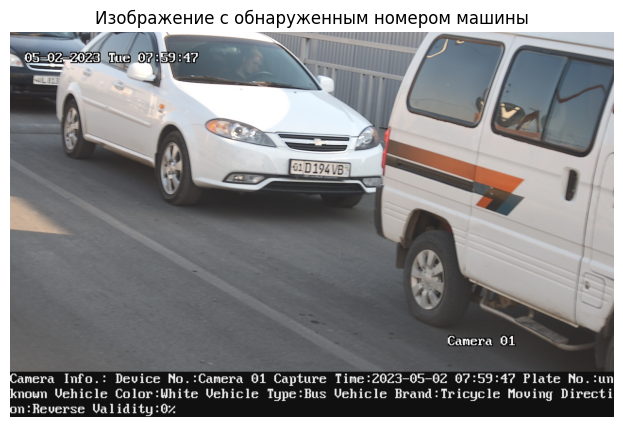

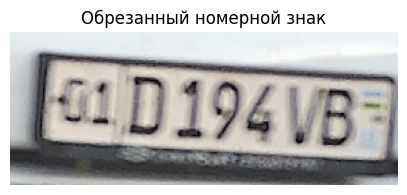

In [23]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

model = YOLO('/home/rikitwiki/Desktop/best.pt')

results = model('/home/rikitwiki/Desktop/gts/01D194VB_0_unknown.jpeg')

if len(results) > 0:
    boxes = results[0].boxes
    if len(boxes.xyxy) > 0:
        xmin, ymin, xmax, ymax = boxes.xyxy[0].cpu().numpy()

        img_path = '/home/rikitwiki/Desktop/gts/01D194VB_0_unknown.jpeg'
        img = Image.open(img_path)

        license_plate_img = img.crop((xmin, ymin, xmax, ymax))

        plt.figure(figsize=(10, 5))
        plt.imshow(img)
        plt.title("Изображение с обнаруженным номером машины")
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(5, 2.5))
        plt.imshow(license_plate_img)
        plt.title("Обрезанный номерной знак")
        plt.axis('off')
        plt.show()
else:
    print("Номерные знаки не обнаружены.")

In [21]:
from ultralytics import YOLO
from PIL import Image
import os
import glob

# Define source and destination folders
source_folder = '/home/rikitwiki/Desktop/gts/'
destination_folder = '/home/rikitwiki/Desktop/gts_crop_v2/'

# Load the YOLO model
model = YOLO('/home/rikitwiki/Desktop/best.pt')

# Ensure destination folder exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate over all JPEG images in the source folder
for img_path in glob.glob(os.path.join(source_folder, '*.jpeg')):
    # Predict using the model
    results = model(img_path)

    # Assuming 'results' is a list of detected objects
    if len(results) > 0 and hasattr(results[0], 'boxes'):
        boxes = results[0].boxes  # Accessing boxes of the first detection result
        if len(boxes.xyxy) > 0:
            for i, box in enumerate(boxes.xyxy):
                xmin, ymin, xmax, ymax = box.cpu().numpy()  # Extract bounding box coordinates
                img = Image.open(img_path)
                license_plate_img = img.crop((xmin, ymin, xmax, ymax))
                
                # Define a unique filename for each cropped license plate
                base_name = os.path.basename(img_path)
                save_path = os.path.join(destination_folder, f"{os.path.splitext(base_name)[0]}_plate_{i}.jpeg")
                
                # Save cropped image
                license_plate_img.save(save_path)
    else:
        print(f"No license plates detected in {img_path}.")


image 1/1 /home/rikitwiki/Desktop/gts/05KG178ACG_unknown.jpeg: 416x640 1 License_Plate, 29.3ms
Speed: 1.8ms preprocess, 29.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /home/rikitwiki/Desktop/gts/06KG865ACN_06865ACN.jpeg: 448x640 1 License_Plate, 29.8ms
Speed: 1.9ms preprocess, 29.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/rikitwiki/Desktop/gts/06KG588ABB_06KG588ABB.jpeg: 416x640 1 License_Plate, 25.9ms
Speed: 1.6ms preprocess, 25.9ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /home/rikitwiki/Desktop/gts/01KG485ALD_01485ALD.jpeg: 416x640 (no detections), 25.8ms
Speed: 1.6ms preprocess, 25.8ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /home/rikitwiki/Desktop/gts/01D194VB_0_unknown.jpeg: 416x640 1 License_Plate, 26.1ms
Speed: 1.6ms preprocess, 26.1ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /home/rikitwiki/Des